## Testing JupyterLab

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # Allows me to make the graphs.
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # Set font and plot size to be larger.
from scipy.stats import f_oneway

In [3]:
# Assinging my data of "standard" cards to magic_df
magic_df = pd.read_json('StandardCards.json')

# Placing card names as the begining of each row.
magic_df = magic_df.transpose()

In [4]:
# Replaced all instances of * in the power column. 
magic_df["power"] = magic_df["power"].replace('*', 0)

# pandas.to_numeric(arg, errors='raise', downcast=None)
# Converted all powers from string to numbers.
magic_df["power"] = pd.to_numeric(magic_df["power"])

# Placed all creatures in here.
creatures = magic_df[(magic_df["power"] >= 0)]

In [5]:
# mask = magic_df["colors"].apply(lambda val: 'W' in val) and len(val) == 1) frames = pdf1, df2, df3] anova pythonimport numpy scipy oneway!
# df1 - magic_df[mask]
# Attempting to separate creature colors.

maskW = creatures["colors"].apply(lambda val: 'W' in val and len(val) == 1)
white_creatures = creatures[maskW]


maskG = creatures["colors"].apply(lambda val: 'G' in val and len(val) == 1)
green_creatures = creatures[maskG]


maskU = creatures["colors"].apply(lambda val: 'U' in val and len(val) == 1)
blue_creatures = creatures[maskU]


maskR = creatures["colors"].apply(lambda val: 'R' in val and len(val) == 1)
red_creatures = creatures[maskR]


maskB = creatures["colors"].apply(lambda val: 'B' in val and len(val) == 1)
black_creatures = creatures[maskB]

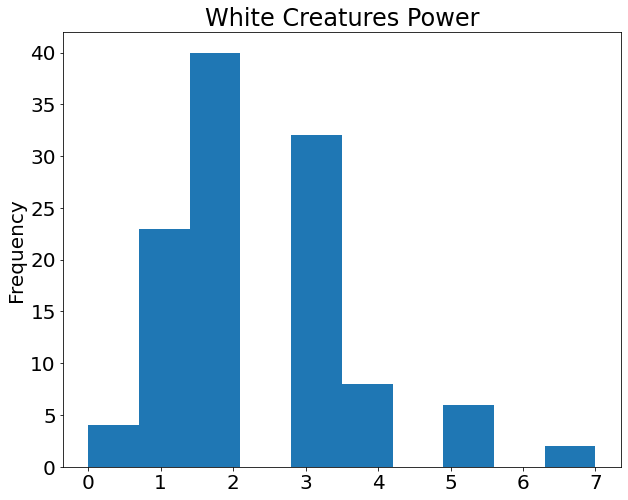

In [6]:
# White creatures power frequency (histogram).
white_creatures['power'].plot(kind='hist', title='White Creatures Power');

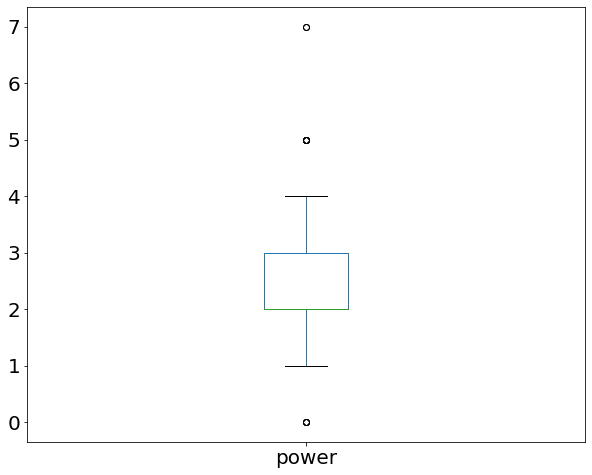

In [7]:
# White creatures power (boxplot).
white_creatures['power'].plot(kind="box");

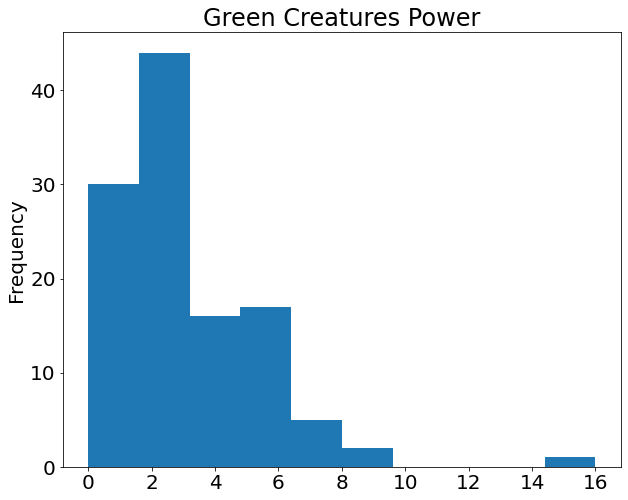

In [8]:
# Green creatures power frequency (histogram).
green_creatures['power'].plot(kind='hist', title='Green Creatures Power');

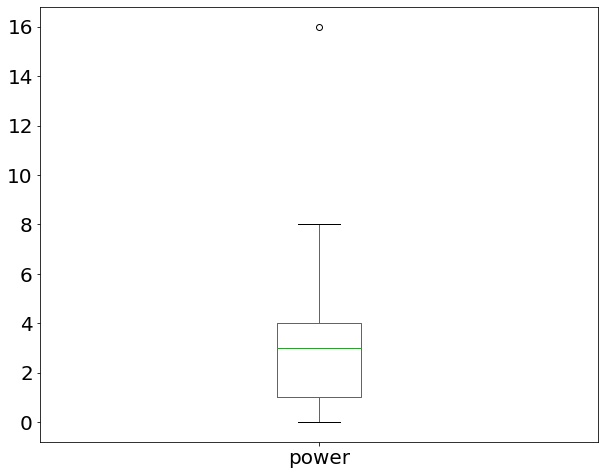

In [9]:
# Green creatures power (boxplot).
green_creatures['power'].plot(kind="box");

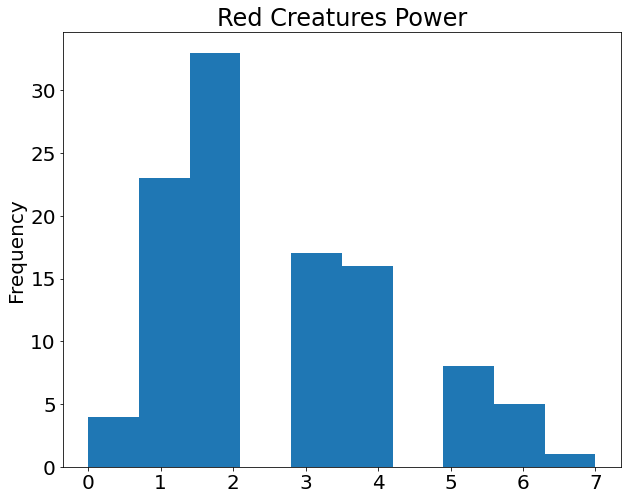

In [10]:
# Red creatures power frequency (histogram).
red_creatures['power'].plot(kind='hist', title='Red Creatures Power');

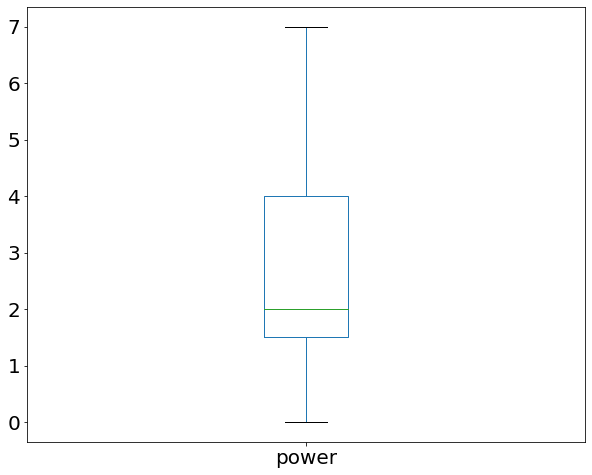

In [11]:
# Red creatures power (boxplot).
red_creatures['power'].plot(kind="box");

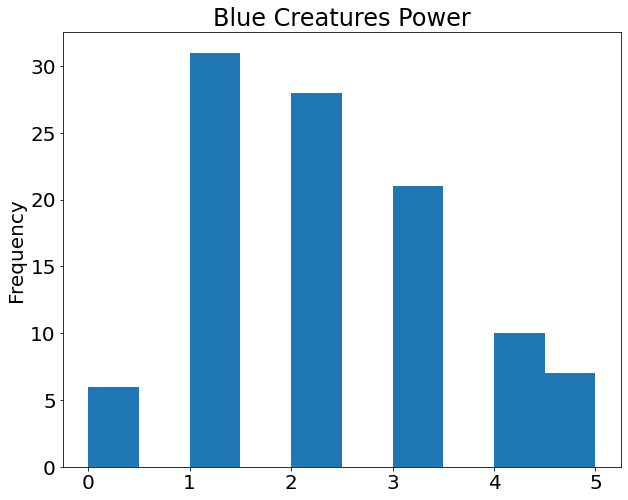

In [12]:
# Blue creatures power frequency (histogram).
blue_creatures['power'].plot(kind='hist', title='Blue Creatures Power');

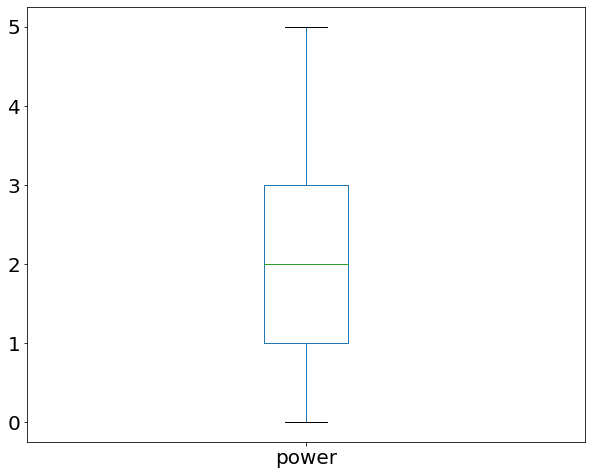

In [13]:
# Blue creatures power (boxplot).
blue_creatures['power'].plot(kind="box");

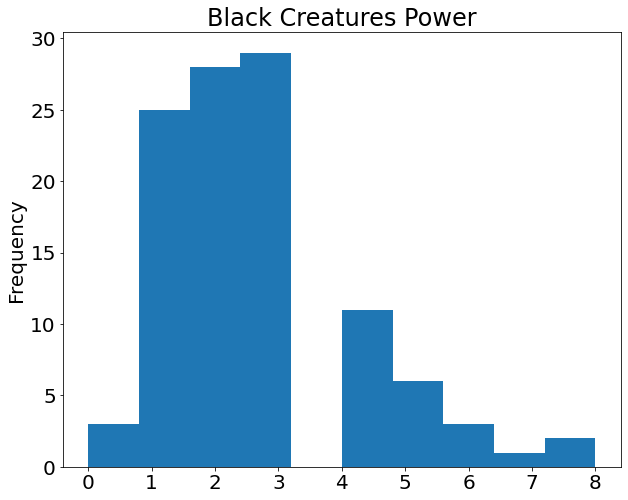

In [14]:
# Black creatures power frequency (histogram).
black_creatures['power'].plot(kind='hist', title='Black Creatures Power');

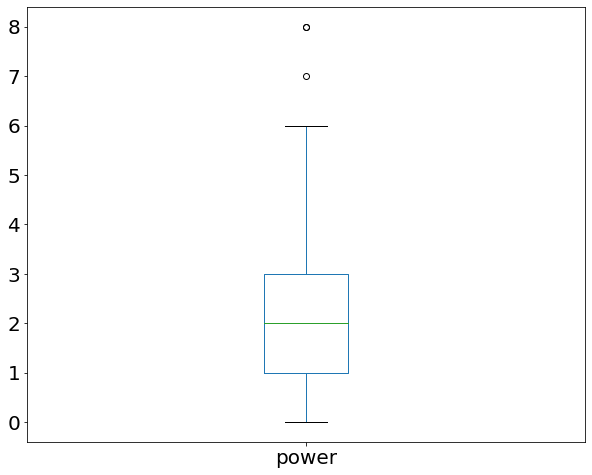

In [15]:
# Black creatures power (boxplot).
black_creatures['power'].plot(kind="box");

In [20]:
# Pin pointing down to the powers only
white_creatures_powers = white_creatures['power']
green_creatures_powers = green_creatures['power']
red_creatures_powers = red_creatures['power']
blue_creatures_powers = blue_creatures['power']
black_creatures_powers = black_creatures['power']

In [21]:
f_oneway(white_creatures_powers, green_creatures_powers, red_creatures_powers, blue_creatures_powers, black_creatures_powers)

F_onewayResult(statistic=3.59089105065836, pvalue=0.006674852797656704)